In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [160]:
def detector_response(x):
    return x + np.random.normal(0,1.5)

def data_reconstruction(d):
    return 10*np.tanh(d/10.)

def analysis_selector(r):
    return np.where(np.mod(r,8)<3,np.ones_like(r),np.zeros_like(r))

def analysis_observable(r):
    return np.cos(1.5*r)

def model(theta1, theta2):
    return np.random.normal(loc = theta1, scale = theta2)

cuts = []
v = analysis_selector(-10)
for c in np.linspace(-10,10,101):
    new = analysis_selector(c)
    if v != new:
        cuts.append(c)
    v = new

In [166]:
def plot(axarr,xset,dset,rset,osset,x,y,eff,bins,cuts):

    axarr[0,0].hist(rset, bins = bins[0], facecolor = 'k', density = True)
    axarr[0,0].set_xlim(-10,10)

    axarr[0,1].hist(xset, bins = bins[0], facecolor = 'k', density = True)
    axarr[0,1].set_xlim(-10,10)


    axarr[1,2].hist(dset, bins = bins[0], facecolor = 'k', orientation = 'horizontal', density = True)
    axarr[1,2].set_ylim(-10,10)

    #mid left
    axarr[2,0].scatter(rset,osset[:,0], alpha = 0.05, c = osset[:,1])
    axarr[2,0].set_xlim(-10,10)
    axarr[2,0].set_ylim(-1,1)
    for c in cuts:
        axarr[2,0].axvline(c, color = 'k', alpha = 0.1)

    #top left

    axarr[1,0].scatter(rset,dset, alpha = 0.05, c = osset[:,1])
    axarr[1,0].set_xlim(-10,10)
    axarr[1,0].set_ylim(-10,10)
    for c in cuts:
        axarr[1,0].axvline(c, color = 'k', alpha = 0.1)


    axarr[1,1].scatter(xset,dset, alpha = 0.05, c = 'k')
    axarr[1,1].set_xlim(-10,10)
    axarr[1,1].set_ylim(-10,10)


    axarr[2,1].scatter(xset,osset[:,0], alpha = 0.05, c = osset[:,1])
    axarr[2,1].set_xlim(-10,10)
    axarr[2,1].set_ylim(-1,1)

    axarr[3,1].pcolormesh(x,y,eff)

    bw = bins[1][1]-bins[1][0]
    filt = osset[:,1]==1
    weights = np.ones_like(osset[:,0])*1./len(osset)/bw
    c,_,_ = axarr[2,2].hist(osset[:,0], facecolor = plt.get_cmap('viridis')(0), bins = bins[1], weights = weights, orientation = 'horizontal')
    axarr[2,2].hist(osset[filt,0],facecolor = plt.get_cmap('viridis')(1.0), bins = bins[1], weights = weights[filt], orientation = 'horizontal')
    axarr[2,2].set_ylim(-1,1)

In [167]:
bins = (np.linspace(-10,10,11),np.linspace(-1,1,11))
def gendata(theta0,theta1, ngen = 10000):
    xset  = np.asarray([model(theta0,theta1) for i in range(ngen)])
    dset  = np.asarray([detector_response(x) for x in xset])
    rset  = np.asarray([data_reconstruction(d) for d in dset])
    osset = np.asarray([[analysis_observable(r),analysis_selector(r)] for r in rset])


    osset_tr = np.asarray([[analysis_observable(x),analysis_selector(x)] for x in xset])

    passidx = osset[:,1]==1
    allcounts,_,_ = np.histogram2d(xset,osset[:,0], bins = bins)
    passcounts,_,_  = np.histogram2d(xset[passidx],osset[:,0][passidx], bins = bins)
    eff = passcounts/allcounts

    x,y = np.meshgrid(bins[0],bins[1], indexing = 'ij')
    return xset,dset,rset,osset,x,y,eff

/Users/lukas/Code/1dhep/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


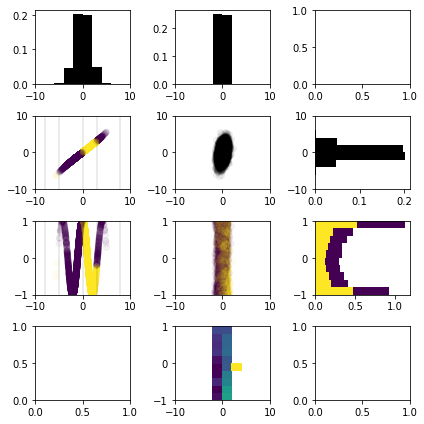

In [168]:
f, axarr = plt.subplots(4,3)
f.set_size_inches(6,6)
plot(axarr,*gendata(0,.5),bins = bins, cuts = cuts)
f.set_tight_layout(True)
plt.show()

/Users/lukas/Code/1dhep/venv/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


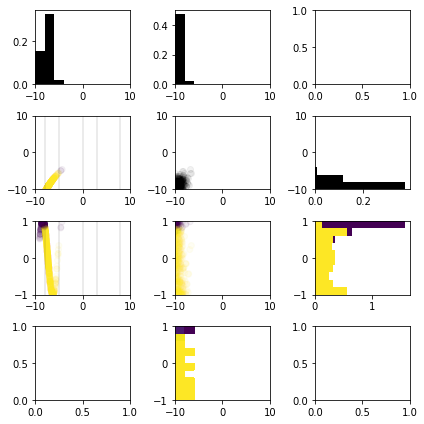

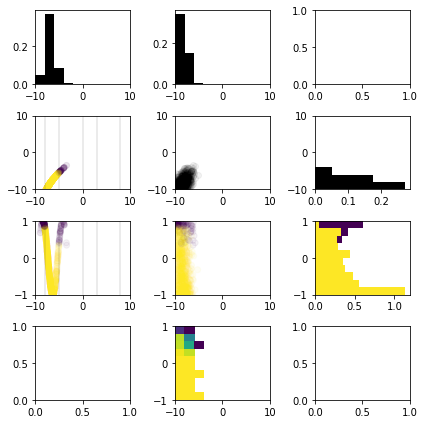

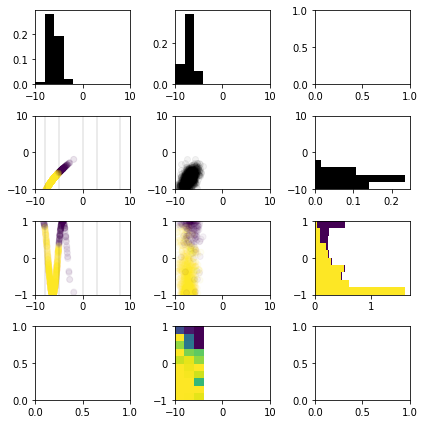

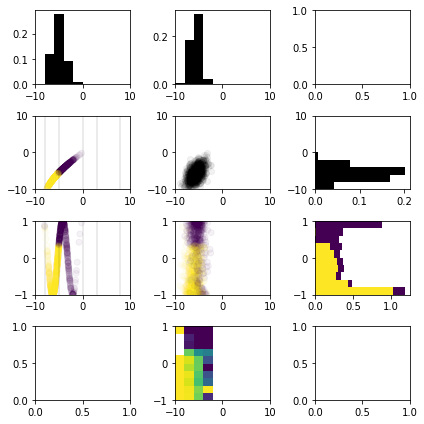

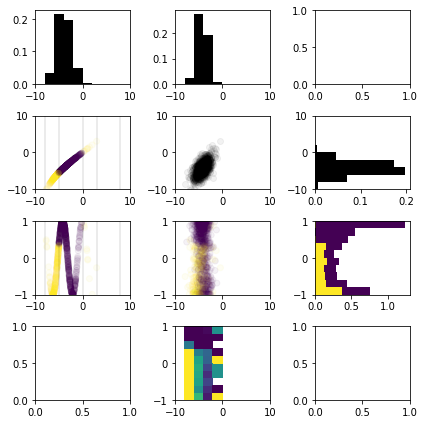

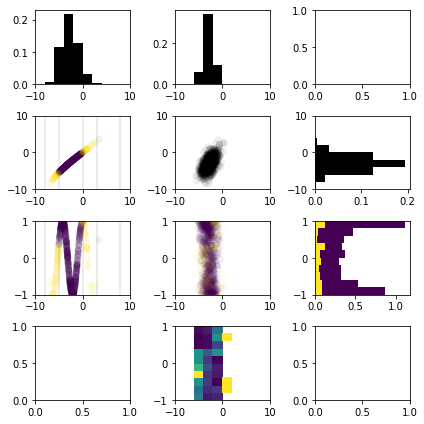

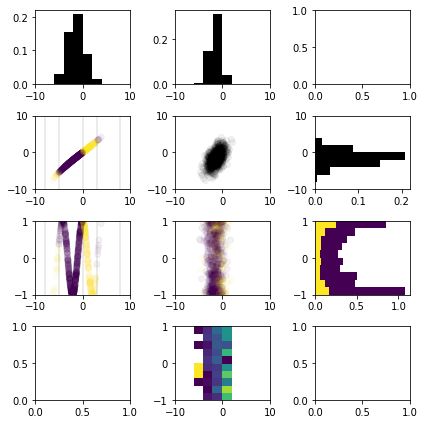

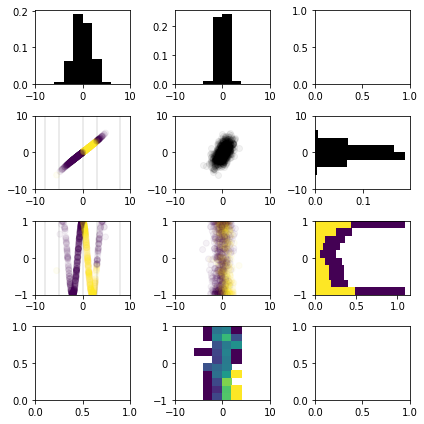

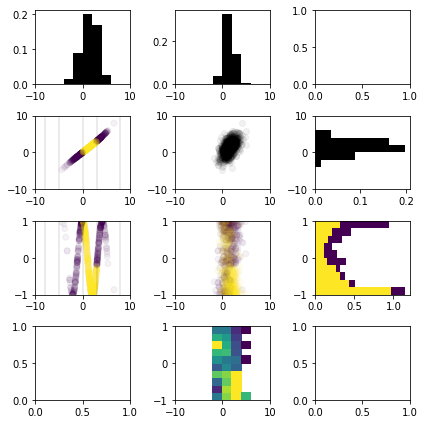

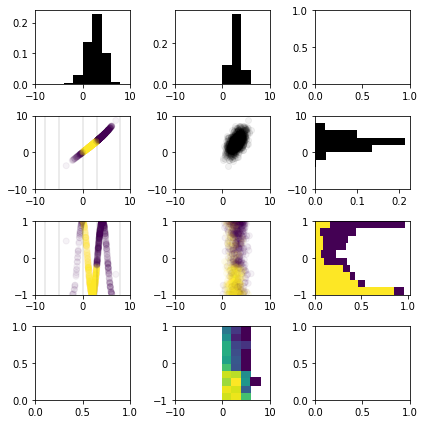

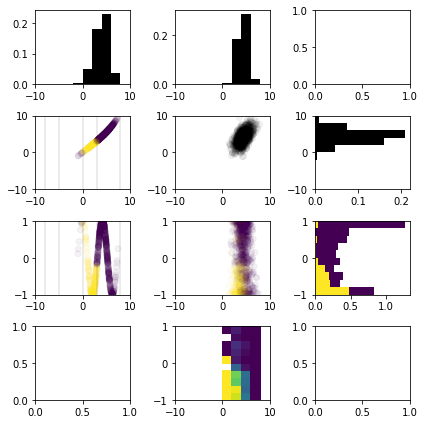

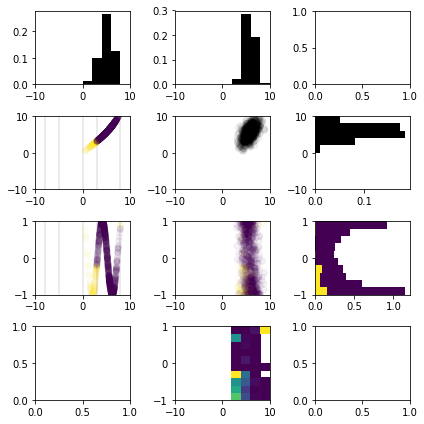

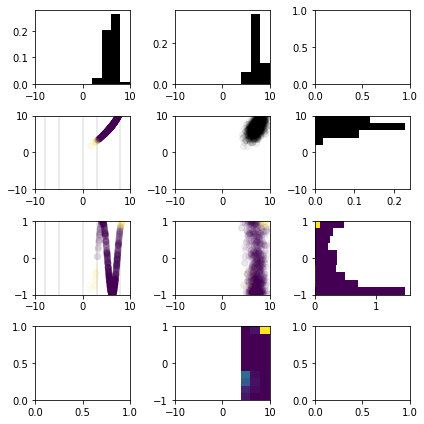

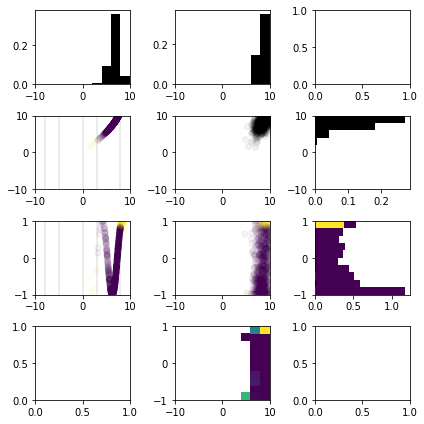

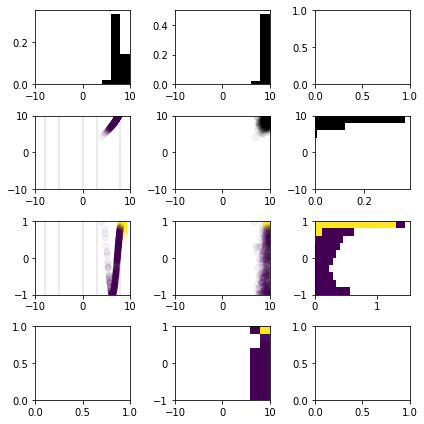

In [169]:
for i,x in enumerate(np.linspace(-10,10,15)):
    f, axarr = plt.subplots(4,3)
    f.set_size_inches(6,6)
    plot(axarr,*gendata(x,1,ngen = 1000),bins = bins, cuts = cuts)
    f.set_tight_layout(True)
    f.savefig('plot{:04}'.format(i))
    plt.show()

In [170]:
!convert -delay 25 *.png animation.gif

In [171]:
!open animation.gif

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

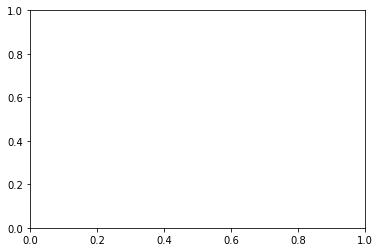

In [141]:
for c in cuts:
    plt.axvline(c)